In [2]:
import ee
ee.Authenticate()
ee.Initialize()

Enter verification code: 4/1ARtbsJrCeEnW8idQpGx1W7XcrA9G9QBivrz9upV52oOVL05vJjBFAR4sbTQ

Successfully saved authorization token.


In [3]:
# Use maximum water extent dataset and monthly water history dataset.
dataset = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory')
water = dataset.select('water')
gsw = ee.Image('JRC/GSW1_0/GlobalSurfaceWater')
max_extent = gsw.select("max_extent").eq(1)

In [4]:
# Extract monthly data
Jan = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory').filter(ee.Filter.eq('month', 1))
Feb = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory').filter(ee.Filter.eq('month', 2))
Mar = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory').filter(ee.Filter.eq('month', 3))
Apr = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory').filter(ee.Filter.eq('month', 4))
May = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory').filter(ee.Filter.eq('month', 5))
Jun = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory').filter(ee.Filter.eq('month', 6))
Jul = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory').filter(ee.Filter.eq('month', 7))    
Aug = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory').filter(ee.Filter.eq('month', 8))    
Sep = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory').filter(ee.Filter.eq('month', 9))
Oct = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory').filter(ee.Filter.eq('month', 10))
Nov = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory').filter(ee.Filter.eq('month', 11))
Dec = ee.ImageCollection('JRC/GSW1_0/MonthlyHistory').filter(ee.Filter.eq('month', 12))

### Wetlands

In [5]:
# Folsom Lake
poly1 = ee.Geometry.Point([-121.133151, 38.723822]).buffer(3000)
# Clear Lake
poly2 = ee.Geometry.Point([-122.845702, 39.064703]).buffer(5000)
# Pyramid Lake
poly3 = ee.Geometry.Point([-119.589517, 40.114412]).buffer(7000)
# Lake Michigan
poly4 = ee.Geometry.Point([-86.295118, 45.215874]).buffer(40000)
# Gunpowder River
poly5 = ee.Geometry.Point([-76.298213, 39.268582]).buffer(7000)

In [6]:
import geemap

In [8]:
m = geemap.Map()

In [12]:
# Show selected areas
occurrence = gsw.select('occurrence')
occurrenceVis = {
  'min': 0.0,
  'max': 100.0,
  'palette': ['ffffff', 'ffbbbb', '0000ff'],
}
m.addLayer(occurrence, occurrenceVis, 'occurrence')

In [18]:
m.addLayer(poly1, {'color': 'FF0000'}, 'Folsom Lake')
m.addLayer(poly2, {'color': 'FF0000'}, 'Clear Lake')
m.addLayer(poly3, {'color': 'FF0000'}, 'Pyramid Lake')
m.addLayer(poly4, {'color': 'FF0000'}, 'Lake Michigan')
m.addLayer(poly5, {'color': 'FF0000'}, 'Gunpowder River')

In [19]:
m

Map(bottom=3479.0, center=[37.33522435930641, -106.96289062500001], controls=(WidgetControl(options=['position…

### IAF of wetlands

In [20]:
# Covert to list
List_1 = Jan.toList(Jan.size())
List_2 = Feb.toList(Feb.size())
List_3 = Mar.toList(Mar.size())
List_4 = Apr.toList(Apr.size())
List_5 = May.toList(May.size())
List_6 = Jun.toList(Jun.size())
List_7 = Jul.toList(Jul.size())
List_8 = Aug.toList(Aug.size())
List_9 = Sep.toList(Sep.size())
List_10 = Oct.toList(Oct.size())
List_11 = Nov.toList(Nov.size())
List_12 = Dec.toList(Dec.size())

In [21]:
# Calculate IAF of wetlands
# Reserve record with no-data values being less than 5% of the maximum extent area
# IAF = wet_pixel_area / max_wet_pixel_area
def computeArea(List, Geometry):
    result = []
    max_sumDictionary = max_extent.reduceRegion(reducer = ee.Reducer.sum(), geometry = Geometry)
    max_wet_pixel_area = ee.Number(max_sumDictionary.get("max_extent")).getInfo()
    extent = ee.Image(List.get(0)).select("water").lte(3)
    extent_sumDictionary = extent.reduceRegion(reducer = ee.Reducer.sum(), geometry = Geometry)
    max_extent_area = ee.Number(extent_sumDictionary.get("water")).getInfo()
    for i in range(List.size().getInfo()):
        water_detected = ee.Image(List.get(i)).select("water").eq(2)
        sumDictionary = water_detected.reduceRegion(reducer = ee.Reducer.sum(), geometry = Geometry)
        wet_pixel_area = ee.Number(sumDictionary.get("water")).getInfo()
        no_observations = ee.Image(List.get(i)).select("water").eq(0)
        sumDictionary1 = no_observations.reduceRegion(reducer = ee.Reducer.sum(), geometry = Geometry)
        no_data_area = ee.Number(sumDictionary1.get("water")).getInfo()
        if no_data_area < max_extent_area * 0.05:
            IAF = wet_pixel_area / max_wet_pixel_area
            result.append(IAF)
    return result

In [23]:
# IAF of Folsom Lake
FL_IAF1 = computeArea(List_1, poly1) # IAF for January
FL_IAF2 = computeArea(List_2, poly1) 
FL_IAF3 = computeArea(List_3, poly1) 
FL_IAF4 = computeArea(List_4, poly1)
FL_IAF5 = computeArea(List_5, poly1) 
FL_IAF6 = computeArea(List_6, poly1) 
FL_IAF7 = computeArea(List_7, poly1) 
FL_IAF8 = computeArea(List_8, poly1) 
FL_IAF9 = computeArea(List_9, poly1)
FL_IAF10 = computeArea(List_10, poly1) 
FL_IAF11 = computeArea(List_11, poly1) 
FL_IAF12 = computeArea(List_12, poly1)
FL_IAF = FL_IAF1 + FL_IAF2 + FL_IAF3 + FL_IAF4 + FL_IAF5 + FL_IAF6 + FL_IAF7 + FL_IAF8 + FL_IAF9 + FL_IAF10 + FL_IAF11 + FL_IAF12

In [25]:
# IAF of Clear Lake
CL_IAF1 = computeArea(List_1, poly2) 
CL_IAF2 = computeArea(List_2, poly2) 
CL_IAF3 = computeArea(List_3, poly2) 
CL_IAF4 = computeArea(List_4, poly2)
CL_IAF5 = computeArea(List_5, poly2) 
CL_IAF6 = computeArea(List_6, poly2) 
CL_IAF7 = computeArea(List_7, poly2) 
CL_IAF8 = computeArea(List_8, poly2) 
CL_IAF9 = computeArea(List_9, poly2)
CL_IAF10 = computeArea(List_10, poly2) 
CL_IAF11 = computeArea(List_11, poly2) 
CL_IAF12 = computeArea(List_12, poly2)
CL_IAF = CL_IAF1 + CL_IAF2 + CL_IAF3 + CL_IAF4 + CL_IAF5 + CL_IAF6 + CL_IAF7 + CL_IAF8 + CL_IAF9 + CL_IAF10 + CL_IAF11 + CL_IAF12

In [26]:
# IAF of Pyramid Lake
PL_IAF1 = computeArea(List_1, poly3) 
PL_IAF2 = computeArea(List_2, poly3) 
PL_IAF3 = computeArea(List_3, poly3) 
PL_IAF4 = computeArea(List_4, poly3)
PL_IAF5 = computeArea(List_5, poly3) 
PL_IAF6 = computeArea(List_6, poly3) 
PL_IAF7 = computeArea(List_7, poly3) 
PL_IAF8 = computeArea(List_8, poly3) 
PL_IAF9 = computeArea(List_9, poly3)
PL_IAF10 = computeArea(List_10, poly3) 
PL_IAF11 = computeArea(List_11, poly3) 
PL_IAF12 = computeArea(List_12, poly3)
PL_IAF = PL_IAF1 + PL_IAF2 + PL_IAF3 + PL_IAF4 + PL_IAF5 + PL_IAF6 + PL_IAF7 + PL_IAF8 + PL_IAF9 + PL_IAF10 + PL_IAF11 + PL_IAF12

In [27]:
# IAF of Lake Michigan
LM_IAF1 = computeArea(List_1, poly4) 
LM_IAF2 = computeArea(List_2, poly4) 
LM_IAF3 = computeArea(List_3, poly4) 
LM_IAF4 = computeArea(List_4, poly4)
LM_IAF5 = computeArea(List_5, poly4) 
LM_IAF6 = computeArea(List_6, poly4) 
LM_IAF7 = computeArea(List_7, poly4) 
LM_IAF8 = computeArea(List_8, poly4) 
LM_IAF9 = computeArea(List_9, poly4)
LM_IAF10 = computeArea(List_10, poly4) 
LM_IAF11 = computeArea(List_11, poly4) 
LM_IAF12 = computeArea(List_12, poly4)
LM_IAF = LM_IAF1 + LM_IAF2 + LM_IAF3 + LM_IAF4 + LM_IAF5 + LM_IAF6 + LM_IAF7 + LM_IAF8 + LM_IAF9 + LM_IAF10 + LM_IAF11 + LM_IAF12

In [28]:
# IAF of Gunpowder River
GR_IAF1 = computeArea(List_1, poly5) 
GR_IAF2 = computeArea(List_2, poly5) 
GR_IAF3 = computeArea(List_3, poly5) 
GR_IAF4 = computeArea(List_4, poly5)
GR_IAF5 = computeArea(List_5, poly5) 
GR_IAF6 = computeArea(List_6, poly5) 
GR_IAF7 = computeArea(List_7, poly5) 
GR_IAF8 = computeArea(List_8, poly5) 
GR_IAF9 = computeArea(List_9, poly5)
GR_IAF10 = computeArea(List_10, poly5) 
GR_IAF11 = computeArea(List_11, poly5) 
GR_IAF12 = computeArea(List_12, poly5)
GR_IAF = GR_IAF1 + GR_IAF2 + GR_IAF3 + GR_IAF4 + GR_IAF5 + GR_IAF6 + GR_IAF7 + GR_IAF8 + GR_IAF9 + GR_IAF10 + GR_IAF11 + GR_IAF12

### Box plot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
Month_FL = ["Jan"]*len(FL_IAF1) + ["Feb"]*len(FL_IAF2) + ["Mar"]*len(FL_IAF3) + \
        ["Apr"]*len(FL_IAF4) + ["May"]*len(FL_IAF5) + ["Jun"]*len(FL_IAF6) + \
        ["Jul"]*len(FL_IAF7) + ["Aug"]*len(FL_IAF8) + ["Sep"]*len(FL_IAF9) + \
        ["Oct"]*len(FL_IAF10) + ["Nov"]*len(FL_IAF11) + ["Dec"]*len(FL_IAF12)

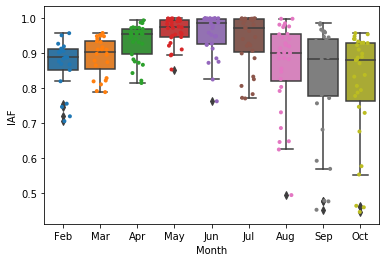

In [31]:
# Draw the boxplot of Folsom Lake
df1 = pd.DataFrame({"IAF" : FL_IAF, "Month" : Month_FL})
pic = sns.boxplot(x="Month", y="IAF", data=df1)
pic = sns.stripplot(x="Month", y="IAF", data=df1, jitter=0.2, size=4)
plt.style.use("ggplot")
plt.show()

In [32]:
Month_CL = ["Jan"]*len(CL_IAF1) + ["Feb"]*len(CL_IAF2) + ["Mar"]*len(CL_IAF3) + \
        ["Apr"]*len(CL_IAF4) + ["May"]*len(CL_IAF5) + ["Jun"]*len(CL_IAF6) + \
        ["Jul"]*len(CL_IAF7) + ["Aug"]*len(CL_IAF8) + ["Sep"]*len(CL_IAF9) + \
        ["Oct"]*len(CL_IAF10) + ["Nov"]*len(CL_IAF11) + ["Dec"]*len(CL_IAF12)

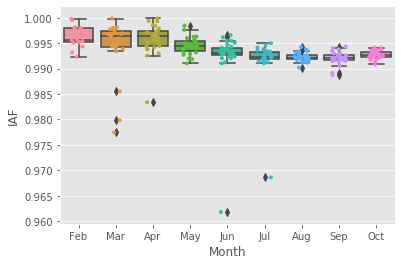

In [33]:
# Draw the boxplot of Clear Lake
df2 = pd.DataFrame({"IAF" : CL_IAF, "Month" : Month_CL})
pic = sns.boxplot(x="Month", y="IAF", data=df2)
pic = sns.stripplot(x="Month", y="IAF", data=df2, jitter=0.2, size=4)
plt.style.use("ggplot")
plt.show()

In [34]:
Month_PL = ["Jan"]*len(PL_IAF1) + ["Feb"]*len(PL_IAF2) + ["Mar"]*len(PL_IAF3) + \
        ["Apr"]*len(PL_IAF4) + ["May"]*len(PL_IAF5) + ["Jun"]*len(PL_IAF6) + \
        ["Jul"]*len(PL_IAF7) + ["Aug"]*len(PL_IAF8) + ["Sep"]*len(PL_IAF9) + \
        ["Oct"]*len(PL_IAF10) + ["Nov"]*len(PL_IAF11) + ["Dec"]*len(PL_IAF12)

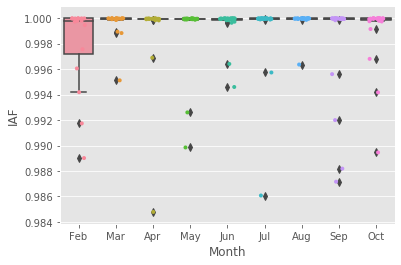

In [35]:
# Draw the boxplot of Pyramid Lake
df3 = pd.DataFrame({"IAF" : PL_IAF, "Month" : Month_PL})
pic = sns.boxplot(x="Month", y="IAF", data=df3)
pic = sns.stripplot(x="Month", y="IAF", data=df3, jitter=0.2, size=4)
plt.style.use("ggplot")
plt.show()

In [36]:
Month_LM = ["Jan"]*len(LM_IAF1) + ["Feb"]*len(LM_IAF2) + ["Mar"]*len(LM_IAF3) + \
        ["Apr"]*len(LM_IAF4) + ["May"]*len(LM_IAF5) + ["Jun"]*len(LM_IAF6) + \
        ["Jul"]*len(LM_IAF7) + ["Aug"]*len(LM_IAF8) + ["Sep"]*len(LM_IAF9) + \
        ["Oct"]*len(LM_IAF10) + ["Nov"]*len(LM_IAF11) + ["Dec"]*len(LM_IAF12)

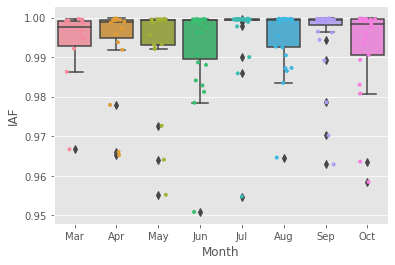

In [37]:
# Draw the boxplot of Lake Michigan
df4 = pd.DataFrame({"IAF" : LM_IAF, "Month" : Month_LM})
pic = sns.boxplot(x="Month", y="IAF", data=df4)
pic = sns.stripplot(x="Month", y="IAF", data=df4, jitter=0.2, size=4)
plt.style.use("ggplot")
plt.show()

In [38]:
Month_GR = ["Jan"]*len(GR_IAF1) + ["Feb"]*len(GR_IAF2) + ["Mar"]*len(GR_IAF3) + \
        ["Apr"]*len(GR_IAF4) + ["May"]*len(GR_IAF5) + ["Jun"]*len(GR_IAF6) + \
        ["Jul"]*len(GR_IAF7) + ["Aug"]*len(GR_IAF8) + ["Sep"]*len(GR_IAF9) + \
        ["Oct"]*len(GR_IAF10) + ["Nov"]*len(GR_IAF11) + ["Dec"]*len(GR_IAF12)

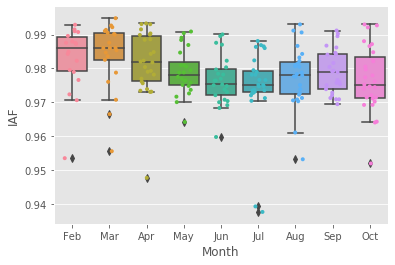

In [39]:
# Draw the boxplot of Gunpowder River
df5 = pd.DataFrame({"IAF" : GR_IAF, "Month" : Month_GR})
pic = sns.boxplot(x="Month", y="IAF", data=df5)
pic = sns.stripplot(x="Month", y="IAF", data=df5, jitter=0.2, size=4)
plt.style.use("ggplot")
plt.show()

### Error bar chart

In [42]:
# Error bar chart of Folsom Lake
# Dots indicate monthly averaged inundated area fraction 
# The length of whiskers indicate the standard deviation of IAF
monthly_averages_FL = df1.groupby('Month').IAF.mean()
standard_deviations_FL = df1.groupby('Month').IAF.std()
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y_FL = []
yerr_FL = []
for i in range(len(Month)):
    if Month[i] in monthly_averages_FL.index:
        y_FL.append(monthly_averages_FL[Month[i]])
        yerr_FL.append(standard_deviations_FL[Month[i]])
    else:
        y_FL.append(0)
        yerr_FL.append(0)

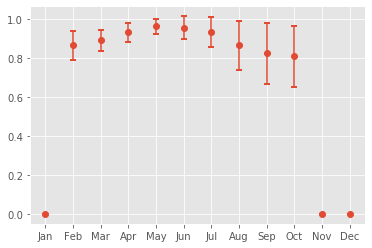

In [43]:
plt.errorbar(Month, y_FL, yerr = yerr_FL, capsize = 3, capthick = 2, linestyle = 'none', marker = 'o')
plt.show()

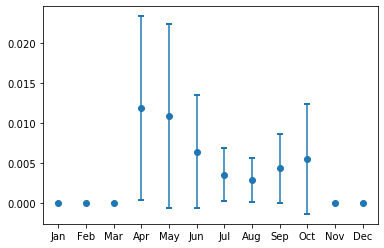

In [5]:
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mean = [0, 0, 0, 0.01187138313887308, 0.010803176108996186, 0.006392182096949793, 0.003538943350105648, 0.002886220996741468, 0.004330943386279938, 0.005499908764784381, 0, 0]
std = [0, 0, 0, 0.011435954267521498, 0.011474408726184507, 0.007072092472852569, 0.003341272688348126, 0.0027265236962388437, 0.00433581317174517, 0.0068564952176321725, 0, 0]
plt.errorbar(Month, mean, yerr = std, capsize = 3, capthick = 2, linestyle = 'none', marker = 'o')
#plt.savefig("C:/Users/X1/Desktop/Box plot of monthly averages deviations of IAF.png")
plt.show()

In [44]:
# Error bar chart of Clear Lake
monthly_averages_CL = df2.groupby('Month').IAF.mean()
standard_deviations_CL = df2.groupby('Month').IAF.std()
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y_CL = []
yerr_CL = []
for i in range(len(Month)):
    if Month[i] in monthly_averages_CL.index:
        y_CL.append(monthly_averages_CL[Month[i]])
        yerr_CL.append(standard_deviations_CL[Month[i]])
    else:
        y_CL.append(0)
        yerr_CL.append(0)

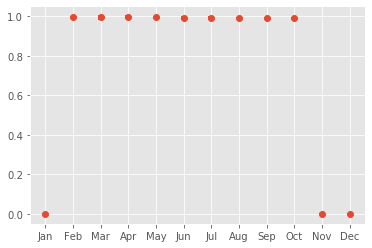

In [45]:
plt.errorbar(Month, y_CL, yerr = yerr_CL, capsize = 3, capthick = 2, linestyle = 'none', marker = 'o')
plt.show()

In [46]:
# Error bar chart of Pyramid Lake
monthly_averages_PL = df3.groupby('Month').IAF.mean()
standard_deviations_PL = df3.groupby('Month').IAF.std()
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y_PL = []
yerr_PL = []
for i in range(len(Month)):
    if Month[i] in monthly_averages_PL.index:
        y_PL.append(monthly_averages_PL[Month[i]])
        yerr_PL.append(standard_deviations_PL[Month[i]])
    else:
        y_PL.append(0)
        yerr_PL.append(0)

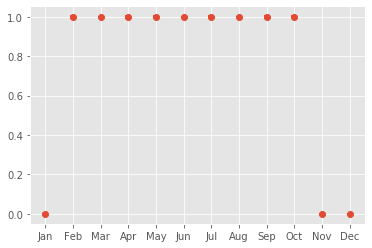

In [47]:
plt.errorbar(Month, y_PL, yerr = yerr_PL, capsize = 3, capthick = 2, linestyle = 'none', marker = 'o')
plt.show()

In [48]:
# Error bar chart of Lake Michigan
monthly_averages_LM = df4.groupby('Month').IAF.mean()
standard_deviations_LM = df4.groupby('Month').IAF.std()
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y_LM = []
yerr_LM = []
for i in range(len(Month)):
    if Month[i] in monthly_averages_LM.index:
        y_LM.append(monthly_averages_LM[Month[i]])
        yerr_LM.append(standard_deviations_LM[Month[i]])
    else:
        y_LM.append(0)
        yerr_LM.append(0)

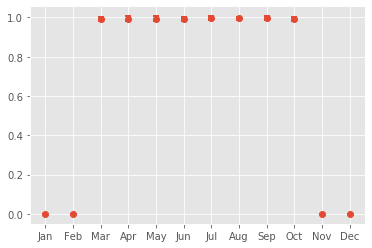

In [49]:
plt.errorbar(Month, y_LM, yerr = yerr_LM, capsize = 3, capthick = 2, linestyle = 'none', marker = 'o')
plt.show()

In [50]:
# Error bar chart of Gunpowder River
monthly_averages_GR = df5.groupby('Month').IAF.mean()
standard_deviations_GR = df5.groupby('Month').IAF.std()
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y_GR = []
yerr_GR = []
for i in range(len(Month)):
    if Month[i] in monthly_averages_GR.index:
        y_GR.append(monthly_averages_GR[Month[i]])
        yerr_GR.append(standard_deviations_GR[Month[i]])
    else:
        y_GR.append(0)
        yerr_GR.append(0)

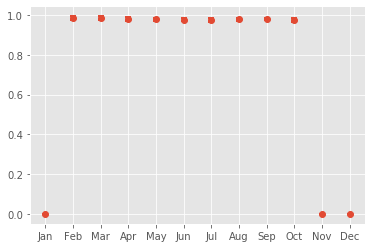

In [51]:
plt.errorbar(Month, y_GR, yerr = yerr_GR, capsize = 3, capthick = 2, linestyle = 'none', marker = 'o')
plt.show()